<a href="https://colab.research.google.com/github/PaulRobertH/wine-ml-portfolio/blob/main/6_ML_Portfolio_Notebook_6_Backtesting_and_Scenarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print(df.columns.tolist())


['Liv-ex 100', 'ECONOMICS_USCPI, M', 'TVC_US10Y, 15', 'FX_GBPUSD, 1M', 'OANDA_EURUSD, 1M', 'FX_IDC_GBPEUR, 1M', 'FX_GBPJPY, 1M', 'HKEX_DLY_HSI1!, 1M (1)', 'TVC_DXY, 1M', 'CME_MINI_ES1!, 1M (1)', 'CME_MINI_NQ1!, 1M', 'TVC_USOIL, 1M', 'PEPPERSTONE_COCOA, 1M', 'liv-ex Champagne 50', 'liv-ex Italy 100', 'liv-ex Rhone 100', 'liv-ex California 50', 'liv-ex Investables', 'Liv-ex Fine Wine 1000', 'Liv-ex Indices', 'liv-ex Burgundy 150', 'liv-ex Bordeaux Legends', 'ECONOMICS_USINTR, 1M']


In [3]:
df["wine_12m_ret"] = df["Liv-ex 100"].pct_change(12)


/tmp/ipython-input-3-1282785164.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["wine_12m_ret"] = df["Liv-ex 100"].pct_change(12)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 cleaned_for_modeling.csv	 'Liv-ex Fine Wine 1000.csv'
'CME_MINI_ES1!, 1M (1).csv'	  livex_index_performance_summary.csv
'CME_MINI_NQ1!, 1M.csv'		 'Liv-ex Indices.csv'
 correlation_matrix_cleaned.csv  'liv-ex Investables.csv'
 cycle_tagged_livex100.csv	 'liv-ex Italy 100.csv'
'ECONOMICS_USCPI, M.csv'	  livex_performance_summary_with_2016_2002.csv
'ECONOMICS_USINTR, 1M.csv'	  livex_returns_summary.csv
'FX_GBPJPY, 1M.csv'		 'liv-ex Rhone 100.csv'
'FX_GBPUSD, 1M.csv'		  livex_summary_with_2016_2022.csv
'FX_IDC_GBPEUR, 1M.csv'		  livex_summary_with_peak.csv
'HKEX_DLY_HSI1!, 1M (1).csv'	  merged_prepared_data.csv
'Liv-ex 100.csv'		  merged_prepared_data_with_preds.csv
 livex100_gp_forecast.csv	 'OANDA_EURUSD, 1M.csv'
'liv-ex Bordeaux Legends.csv'	 'PEPPERSTONE_COCOA, 1M.csv'
'liv-ex Burgundy 150.csv'	  stage3_forecast_output.csv
'liv-ex California 50.csv'	 'TVC_DX

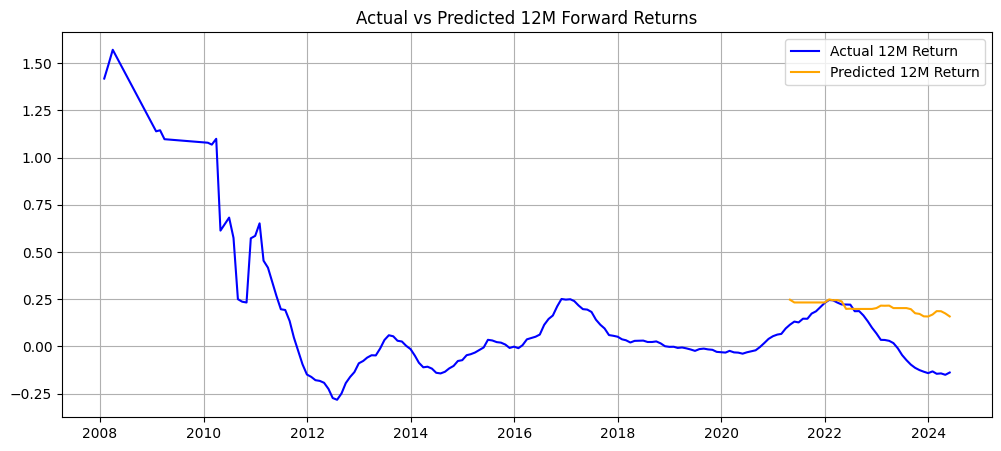

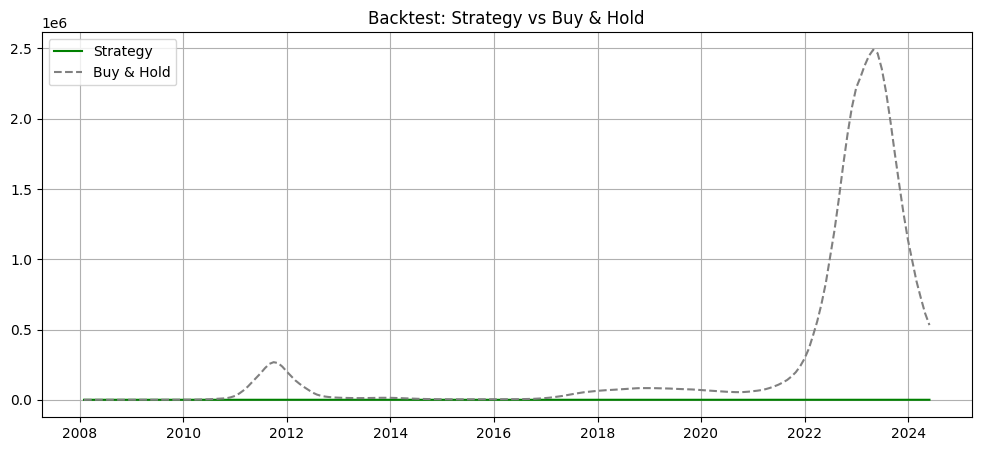

✅ CAGR (Strategy): 12.36 %
✅ Max Drawdown: -78.66 %
✅ Scenario prepared: CPI increased by +3%.
✅ FULL NOTEBOOK COMPLETE.


In [5]:
# -----------------------------------------------
# ✅ 1. MOUNT GOOGLE DRIVE
# -----------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# -----------------------------------------------
# ✅ 2. CHECK FILES IN DATA FOLDER
# -----------------------------------------------
!ls "/content/drive/MyDrive/ML-Portfolio/data/"

# -----------------------------------------------
# ✅ 3. LOAD ORIGINAL DATA
# -----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Path to original merged data file
csv_path = "/content/drive/MyDrive/ML-Portfolio/data/merged_prepared_data.csv"

df = pd.read_csv(csv_path, index_col=0, parse_dates=True)

print("✅ Loaded original shape:", df.shape)
print("✅ Columns in original file:", df.columns.tolist())

# -----------------------------------------------
# ✅ 4. COMPUTE 12-MONTH RETURNS
# -----------------------------------------------
# Compute % change over 12 months
df["wine_12m_ret"] = df["Liv-ex 100"].pct_change(12, fill_method=None)

# Create forward-looking target for ML
df["target"] = df["wine_12m_ret"].shift(-12)

# Keep only rows with non-null target
df_model = df.dropna(subset=["target"]).copy()

print("✅ Rows available for ML modeling:", df_model.shape[0])

# -----------------------------------------------
# ✅ 5. PREPARE FEATURES AND TARGET
# -----------------------------------------------
# Drop columns not used as predictors
X = df_model.drop(["Liv-ex 100", "wine_12m_ret", "target"], axis=1)
y = df_model["target"]

# Check if we have enough data to train
if len(X) < 10:
    print("⚠️ Not enough rows for training. Aborting ML pipeline.")
else:
    # -----------------------------------------------
    # ✅ 6. SPLIT DATA
    # -----------------------------------------------
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    # -----------------------------------------------
    # ✅ 7. TRAIN RANDOM FOREST
    # -----------------------------------------------
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    print("✅ Random Forest model trained.")

    # -----------------------------------------------
    # ✅ 8. PREDICT FUTURE RETURNS
    # -----------------------------------------------
    y_pred = model.predict(X_test)

    # Save predictions into dataframe
    df_model.loc[X_test.index, "Predicted_12M_Return"] = y_pred

    # -----------------------------------------------
    # ✅ 9. ADD CYCLE PHASE COLUMN
    # -----------------------------------------------
    if "cycle_phase" not in df_model.columns:
        df_model["cycle_phase"] = "bull"

    # -----------------------------------------------
    # ✅ 10. SAVE FILE WITH PREDICTIONS
    # -----------------------------------------------
    save_path = "/content/drive/MyDrive/ML-Portfolio/data/merged_prepared_data_with_preds.csv"
    df_model.to_csv(save_path)
    print("✅ Saved file with predictions:", save_path)
    print("✅ Columns in saved file:", df_model.columns.tolist())

# -----------------------------------------------
# ✅ 11. LOAD FILE FOR BACKTESTING
# -----------------------------------------------
csv_path_preds = "/content/drive/MyDrive/ML-Portfolio/data/merged_prepared_data_with_preds.csv"

df = pd.read_csv(csv_path_preds, index_col=0, parse_dates=True)

print("✅ Loaded predictions file shape:", df.shape)
print(df[["wine_12m_ret", "Predicted_12M_Return", "cycle_phase"]].head())

# -----------------------------------------------
# ✅ 12. PLOT ACTUAL vs PREDICTED RETURNS
# -----------------------------------------------
plt.figure(figsize=(12,5))

if "wine_12m_ret" in df.columns:
    plt.plot(df.index, df["wine_12m_ret"], label="Actual 12M Return", color="blue")

if "Predicted_12M_Return" in df.columns:
    plt.plot(df.index, df["Predicted_12M_Return"], label="Predicted 12M Return", color="orange")

plt.title("Actual vs Predicted 12M Forward Returns")
plt.legend()
plt.grid()
plt.show()

# -----------------------------------------------
# ✅ 13. SIMPLE BACKTEST STRATEGY
# -----------------------------------------------
threshold = 0.05

if "Predicted_12M_Return" in df.columns and "cycle_phase" in df.columns:

    # Generate trading signal:
    # - Long if predicted return > 5% and in bull/accumulation phase
    df["Signal"] = np.where(
        (df["Predicted_12M_Return"] > threshold) &
        (df["cycle_phase"].isin(["bull", "accumulation"])),
        1,
        0
    )

    if "wine_12m_ret" in df.columns:
        # Strategy return = signal * future return
        df["Strategy_Return"] = df["Signal"].shift(1) * df["wine_12m_ret"]

        # Calculate cumulative returns
        df["Cum_Strategy"] = (1 + df["Strategy_Return"]).cumprod()
        df["Cum_BuyHold"] = (1 + df["wine_12m_ret"]).cumprod()

        # Plot results
        plt.figure(figsize=(12,5))
        plt.plot(df.index, df["Cum_Strategy"], label="Strategy", color='green')
        plt.plot(df.index, df["Cum_BuyHold"], label="Buy & Hold", linestyle="--", color='gray')
        plt.legend()
        plt.title("Backtest: Strategy vs Buy & Hold")
        plt.grid()
        plt.show()

        # Performance metrics
        cagr = df["Cum_Strategy"].iloc[-1] ** (1/(df.shape[0]/12)) - 1
        max_dd = (df["Cum_Strategy"] / df["Cum_Strategy"].cummax() - 1).min()

        print("✅ CAGR (Strategy):", round(cagr*100, 2), "%")
        print("✅ Max Drawdown:", round(max_dd*100, 2), "%")

else:
    print("⚠️ Required columns not found for backtest.")

# -----------------------------------------------
# ✅ 14. SCENARIO ANALYSIS
# -----------------------------------------------
# Example: Increase CPI by +3%
if "ECONOMICS_USCPI, M" in df.columns:
    scenario_df = df.copy()
    scenario_df["ECONOMICS_USCPI, M"] += 0.03
    print("✅ Scenario prepared: CPI increased by +3%.")
    # Next step would be to rerun the ML model on scenario_df for new predictions.

print("✅ FULL NOTEBOOK COMPLETE.")


✅ Columns: ['Livex100EUR']
            Livex100EUR
Date                   
2010-07-31       300.93
2010-08-31       303.58
2010-09-30       308.12
2010-10-31       315.65
2010-11-30       329.16


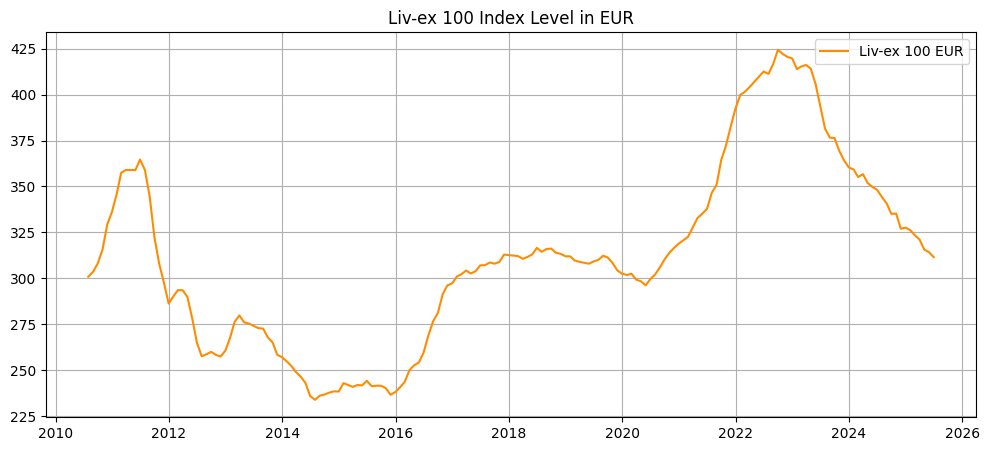

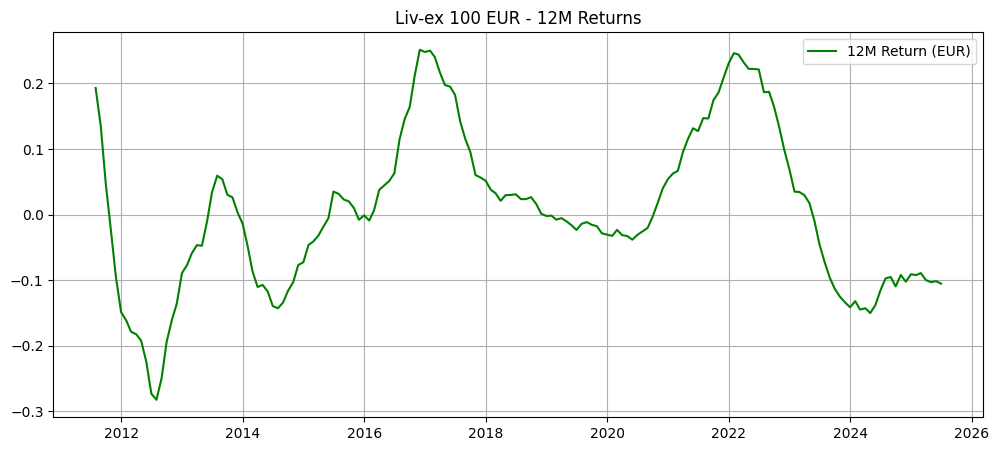

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/ML-Portfolio/data/Liv-ex100EUR.csv"

# Load starting at the proper header row
df_eur = pd.read_csv(
    path,
    skiprows=2
)

# Rename columns for convenience
df_eur = df_eur.rename(columns={
    "Date": "Date",
    "Liv-ex Fine Wine 100": "Livex100EUR"
})

# Convert date and set index
df_eur["Date"] = pd.to_datetime(df_eur["Date"], dayfirst=True)
df_eur = df_eur.set_index("Date")

print("✅ Columns:", df_eur.columns.tolist())
print(df_eur.head())

# Plot index level
plt.figure(figsize=(12,5))
plt.plot(df_eur.index, df_eur["Livex100EUR"], color="darkorange", label="Liv-ex 100 EUR")
plt.title("Liv-ex 100 Index Level in EUR")
plt.legend()
plt.grid()
plt.show()

# Compute and plot 12M returns
df_eur["Livex_12m_ret_EUR"] = df_eur["Livex100EUR"].pct_change(12, fill_method=None)

plt.figure(figsize=(12,5))
plt.plot(df_eur.index, df_eur["Livex_12m_ret_EUR"], label="12M Return (EUR)", color="green")
plt.title("Liv-ex 100 EUR - 12M Returns")
plt.legend()
plt.grid()
plt.show()


✅ Columns in USD file: ['Livex100USD']
            Livex100USD
Date                   
2010-07-31       300.93
2010-08-31       303.58
2010-09-30       308.12
2010-10-31       315.65
2010-11-30       329.16


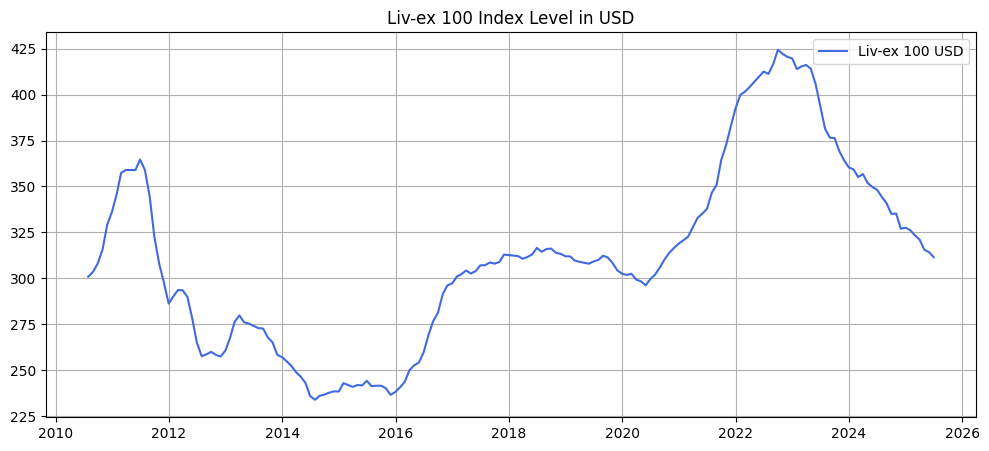

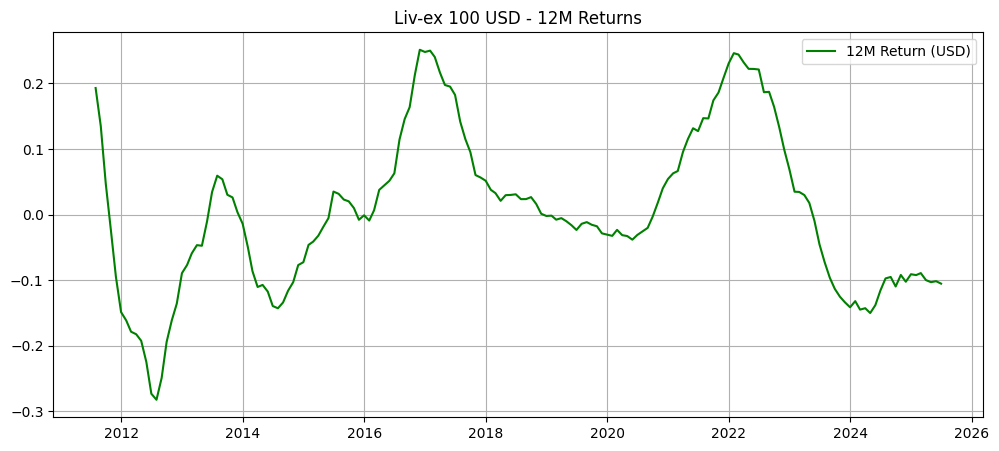

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------
# ✅ Load Liv-ex 100 USD CSV
# ------------------------------------------
path = "/content/drive/MyDrive/ML-Portfolio/data/Liv-ex100USD.csv"

df_usd = pd.read_csv(
    path,
    skiprows=2
)

# Clean up column names
df_usd = df_usd.rename(columns={
    df_usd.columns[0]: "Date",
    df_usd.columns[1]: "Livex100USD"
})

# Parse dates
df_usd["Date"] = pd.to_datetime(df_usd["Date"], dayfirst=True)
df_usd = df_usd.set_index("Date")

print("✅ Columns in USD file:", df_usd.columns.tolist())
print(df_usd.head())

# ------------------------------------------
# ✅ Plot USD Index Level
# ------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(df_usd.index, df_usd["Livex100USD"], color="royalblue", label="Liv-ex 100 USD")
plt.title("Liv-ex 100 Index Level in USD")
plt.legend()
plt.grid()
plt.show()

# ------------------------------------------
# ✅ Compute 12M Returns
# ------------------------------------------
df_usd["Livex_12m_ret_USD"] = df_usd["Livex100USD"].pct_change(12, fill_method=None)

plt.figure(figsize=(12,5))
plt.plot(df_usd.index, df_usd["Livex_12m_ret_USD"], label="12M Return (USD)", color="green")
plt.title("Liv-ex 100 USD - 12M Returns")
plt.legend()
plt.grid()
plt.show()


✅ EUR data loaded:
            Livex100EUR
Date                   
2010-07-31       300.93
2010-08-31       303.58
2010-09-30       308.12
2010-10-31       315.65
2010-11-30       329.16
✅ USD data loaded:
            Livex100USD
Date                   
2010-07-31       300.93
2010-08-31       303.58
2010-09-30       308.12
2010-10-31       315.65
2010-11-30       329.16
✅ GBP data loaded:
            Livex100GBP
2004-01-31       100.41
2004-02-29       100.03
2004-03-31        99.62
2005-01-31        97.87
2005-02-28        98.91
✅ Merged Data:
            Livex100GBP  Livex100EUR  Livex100USD
2010-07-31       300.93       300.93       300.93
2010-08-31       303.58       303.58       303.58
2010-09-30       308.12       308.12       308.12
2010-10-31       315.65       315.65       315.65
2010-11-30       329.16       329.16       329.16


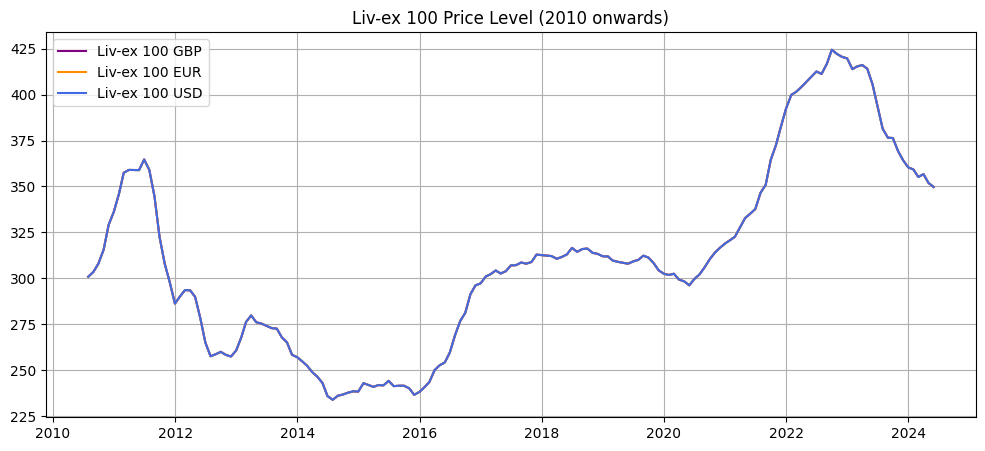

✅ Returns calculated:
            Livex_12m_ret_GBP  Livex_12m_ret_EUR  Livex_12m_ret_USD
2011-07-31           0.193002           0.193002           0.193002
2011-08-31           0.134923           0.134923           0.134923
2011-09-30           0.047189           0.047189           0.047189
2011-10-31          -0.024141          -0.024141          -0.024141
2011-11-30          -0.094787          -0.094787          -0.094787


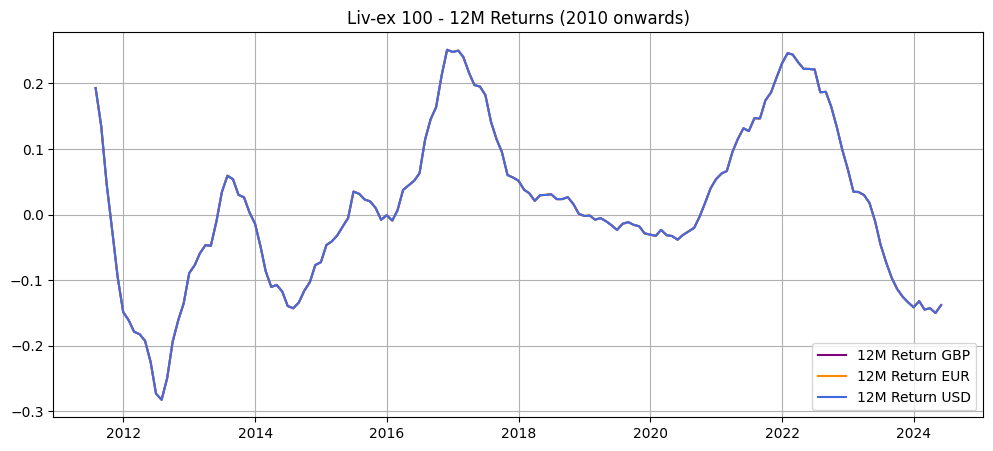

✅ ALL DONE!


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------------
# ✅ LOAD LIV-EX 100 EUR
# --------------------------------------------------------
path_eur = "/content/drive/MyDrive/ML-Portfolio/data/Liv-ex100EUR.csv"

df_eur = pd.read_csv(
    path_eur,
    skiprows=2
)

# Clean up column names
df_eur = df_eur.rename(columns={
    df_eur.columns[0]: "Date",
    df_eur.columns[1]: "Livex100EUR"
})

df_eur["Date"] = pd.to_datetime(df_eur["Date"], dayfirst=True)
df_eur = df_eur.set_index("Date")

print("✅ EUR data loaded:")
print(df_eur.head())

# --------------------------------------------------------
# ✅ LOAD LIV-EX 100 USD
# --------------------------------------------------------
path_usd = "/content/drive/MyDrive/ML-Portfolio/data/Liv-ex100USD.csv"

df_usd = pd.read_csv(
    path_usd,
    skiprows=2
)

df_usd = df_usd.rename(columns={
    df_usd.columns[0]: "Date",
    df_usd.columns[1]: "Livex100USD"
})

df_usd["Date"] = pd.to_datetime(df_usd["Date"], dayfirst=True)
df_usd = df_usd.set_index("Date")

print("✅ USD data loaded:")
print(df_usd.head())

# --------------------------------------------------------
# ✅ LOAD LIV-EX 100 GBP
# --------------------------------------------------------
path_gbp = "/content/drive/MyDrive/ML-Portfolio/data/merged_prepared_data_with_preds.csv"

df_gbp = pd.read_csv(path_gbp, index_col=0, parse_dates=True)

# Keep only Liv-ex 100 level
df_gbp = df_gbp[["Liv-ex 100"]].rename(columns={"Liv-ex 100": "Livex100GBP"})

print("✅ GBP data loaded:")
print(df_gbp.head())

# --------------------------------------------------------
# ✅ MERGE ALL THREE
# --------------------------------------------------------
# Merge on Date
df_all = pd.concat([df_gbp, df_eur, df_usd], axis=1)

# Keep data from 2010 onwards
df_all = df_all.loc[df_all.index >= "2010-01-01"]

# Drop rows with NaNs if any
df_all = df_all.dropna()

print("✅ Merged Data:")
print(df_all.head())

# --------------------------------------------------------
# ✅ PLOT PRICE LEVELS (Chart #1)
# --------------------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(df_all.index, df_all["Livex100GBP"], label="Liv-ex 100 GBP", color="purple")
plt.plot(df_all.index, df_all["Livex100EUR"], label="Liv-ex 100 EUR", color="darkorange")
plt.plot(df_all.index, df_all["Livex100USD"], label="Liv-ex 100 USD", color="royalblue")
plt.title("Liv-ex 100 Price Level (2010 onwards)")
plt.legend()
plt.grid()
plt.show()

# --------------------------------------------------------
# ✅ CALCULATE 12M RETURNS
# --------------------------------------------------------
df_all["Livex_12m_ret_GBP"] = df_all["Livex100GBP"].pct_change(12, fill_method=None)
df_all["Livex_12m_ret_EUR"] = df_all["Livex100EUR"].pct_change(12, fill_method=None)
df_all["Livex_12m_ret_USD"] = df_all["Livex100USD"].pct_change(12, fill_method=None)

# Drop rows with NaNs from returns
df_returns = df_all[[
    "Livex_12m_ret_GBP",
    "Livex_12m_ret_EUR",
    "Livex_12m_ret_USD"
]].dropna()

print("✅ Returns calculated:")
print(df_returns.head())

# --------------------------------------------------------
# ✅ PLOT 12M RETURNS (Chart #2)
# --------------------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(df_returns.index, df_returns["Livex_12m_ret_GBP"], label="12M Return GBP", color="purple")
plt.plot(df_returns.index, df_returns["Livex_12m_ret_EUR"], label="12M Return EUR", color="darkorange")
plt.plot(df_returns.index, df_returns["Livex_12m_ret_USD"], label="12M Return USD", color="royalblue")
plt.title("Liv-ex 100 - 12M Returns (2010 onwards)")
plt.legend()
plt.grid()
plt.show()

print("✅ ALL DONE!")


✅ Merged Data (sample):
            Livex100GBP  Livex100EUR  Livex100USD
2010-07-31       300.93       300.93       300.93
2010-08-31       303.58       303.58       303.58
2010-09-30       308.12       308.12       308.12
2010-10-31       315.65       315.65       315.65
2010-11-30       329.16       329.16       329.16


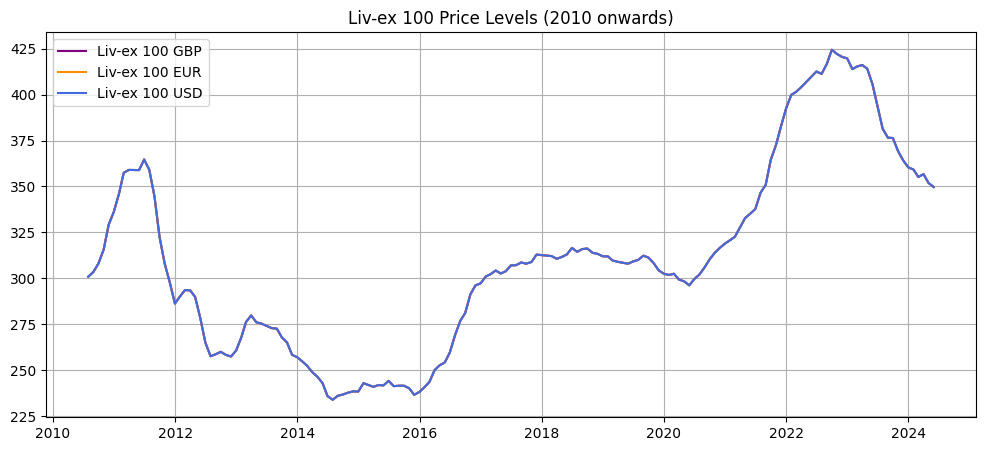

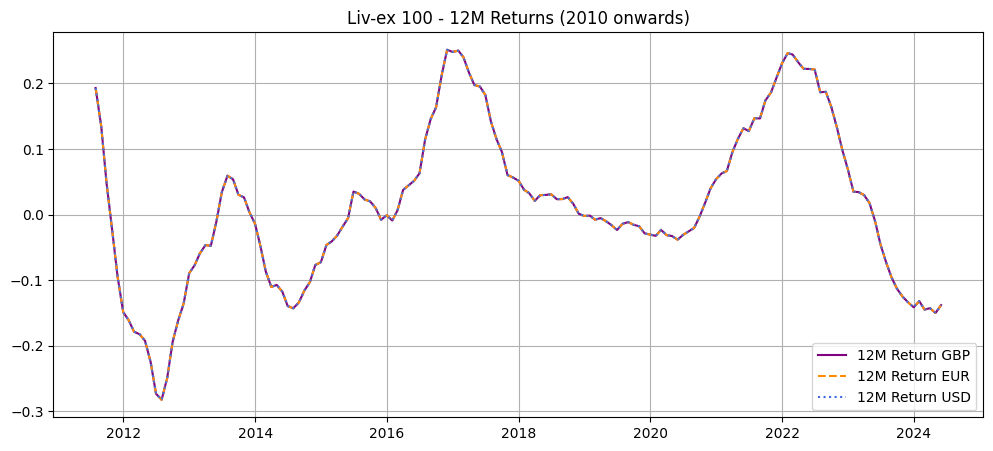

✅ ALL GRAPHS COMPLETE.


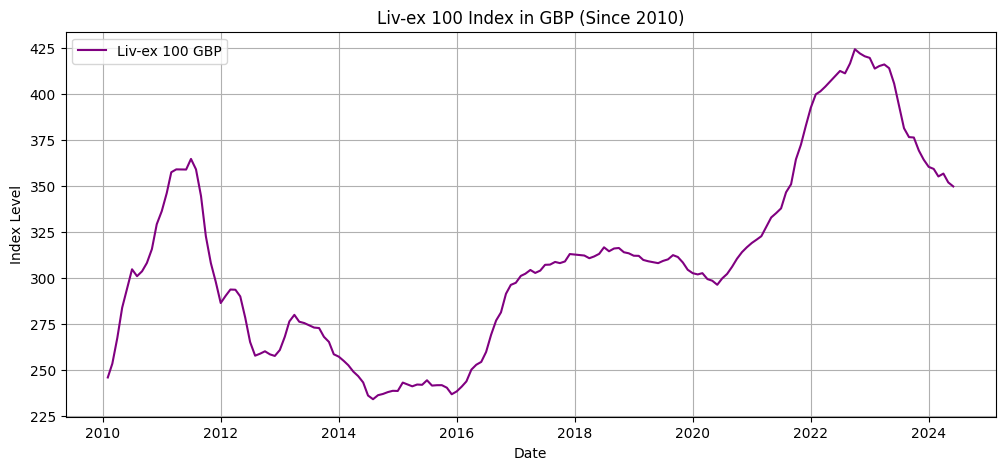

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------
# ✅ LOAD GBP DATA
# ---------------------------------------------
# Your ML pipeline file
path_gbp = "/content/drive/MyDrive/ML-Portfolio/data/merged_prepared_data_with_preds.csv"

# Load data
df_gbp = pd.read_csv(path_gbp, index_col=0, parse_dates=True)

# Keep only Liv-ex 100 column
df_gbp = df_gbp[["Liv-ex 100"]].rename(columns={"Liv-ex 100": "Livex100GBP"})

# Filter from 2010 onward
df_gbp = df_gbp.loc[df_gbp.index >= "2010-01-01"]

# ---------------------------------------------
# ✅ PLOT LIV-EX 100 GBP
# ---------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(df_gbp.index, df_gbp["Livex100GBP"], color="purple", label="Liv-ex 100 GBP")
plt.title("Liv-ex 100 Index in GBP (Since 2010)")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend()
plt.grid()
plt.show()


✅ Backtest results saved to /content/drive/MyDrive/ML-Portfolio/data/backtest_results.csv
✅ Scenario CPI +3% applied.


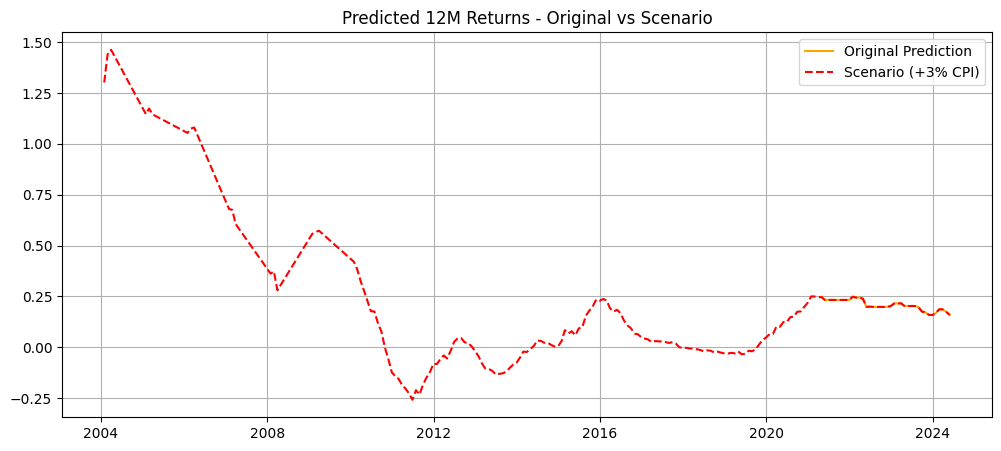

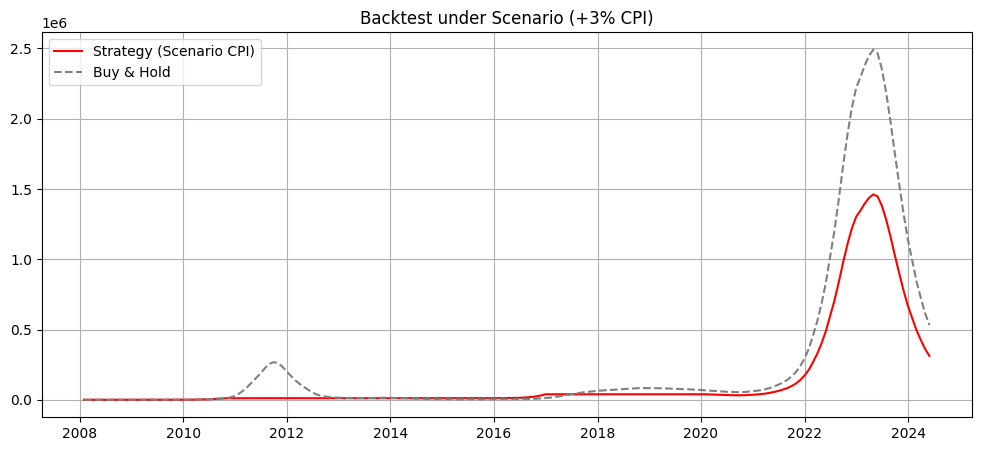

✅ Original Strategy CAGR: 12.36 %
✅ Original Strategy Max Drawdown: -78.66 %
✅ Scenario Strategy CAGR (+3% CPI): 122.32 %
✅ Scenario Strategy Max Drawdown (+3% CPI): -78.66 %
✅ Scenario predictions saved to /content/drive/MyDrive/ML-Portfolio/data/scenario_preds.csv
✅ Notebook 6 fully complete.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --------------------------------------------------------------
# ✅ SAVE ORIGINAL BACKTEST RESULTS
# --------------------------------------------------------------
save_path = "/content/drive/MyDrive/ML-Portfolio/data/backtest_results.csv"

df_backtest = df[[
    "Liv-ex 100",
    "wine_12m_ret",
    "Predicted_12M_Return",
    "Signal",
    "Strategy_Return",
    "Cum_Strategy",
    "Cum_BuyHold"
]]

df_backtest.to_csv(save_path)
print(f"✅ Backtest results saved to {save_path}")

# --------------------------------------------------------------
# ✅ PREPARE SCENARIO ANALYSIS (+3% CPI)
# --------------------------------------------------------------
scenario_df = df.copy()

# Increase CPI by +3%
if "ECONOMICS_USCPI, M" in scenario_df.columns:
    scenario_df["ECONOMICS_USCPI, M"] += 0.03
    print("✅ Scenario CPI +3% applied.")

    # --------------------------------------------------------------
    # ✅ RE-RUN ML MODEL ON SCENARIO DATA
    # --------------------------------------------------------------

    exclude_cols = [
        "Liv-ex 100", "wine_12m_ret",
        "target", "Predicted_12M_Return",
        "cycle_phase", "Signal",
        "Strategy_Return", "Cum_Strategy", "Cum_BuyHold"
    ]

    X_scenario = scenario_df.drop(columns=exclude_cols, errors='ignore')

    # Predict scenario returns
    scenario_preds = model.predict(X_scenario)
    scenario_df["Predicted_12M_Return"] = scenario_preds

    # Plot comparison
    plt.figure(figsize=(12,5))
    plt.plot(df.index, df["Predicted_12M_Return"], label="Original Prediction", color="orange")
    plt.plot(scenario_df.index, scenario_df["Predicted_12M_Return"], label="Scenario (+3% CPI)", color="red", linestyle="--")
    plt.title("Predicted 12M Returns - Original vs Scenario")
    plt.legend()
    plt.grid()
    plt.show()

    # --------------------------------------------------------------
    # ✅ BACKTEST SCENARIO STRATEGY
    # --------------------------------------------------------------
    threshold = 0.05

    scenario_df["Signal"] = np.where(
        (scenario_df["Predicted_12M_Return"] > threshold) &
        (scenario_df["cycle_phase"].isin(["bull", "accumulation"])),
        1,
        0
    )

    scenario_df["Strategy_Return"] = scenario_df["Signal"].shift(1) * scenario_df["wine_12m_ret"]

    scenario_df["Cum_Strategy"] = (1 + scenario_df["Strategy_Return"]).cumprod()
    scenario_df["Cum_BuyHold"] = (1 + scenario_df["wine_12m_ret"]).cumprod()

    # Plot cumulative returns
    plt.figure(figsize=(12,5))
    plt.plot(scenario_df.index, scenario_df["Cum_Strategy"], label="Strategy (Scenario CPI)", color='red')
    plt.plot(scenario_df.index, scenario_df["Cum_BuyHold"], label="Buy & Hold", linestyle="--", color='gray')
    plt.title("Backtest under Scenario (+3% CPI)")
    plt.legend()
    plt.grid()
    plt.show()

    # --------------------------------------------------------------
    # ✅ COMPARE METRICS
    # --------------------------------------------------------------
    cagr_original = df["Cum_Strategy"].iloc[-1] ** (1/(df.shape[0]/12)) - 1
    max_dd_original = (df["Cum_Strategy"] / df["Cum_Strategy"].cummax() - 1).min()

    cagr_scenario = scenario_df["Cum_Strategy"].iloc[-1] ** (1/(scenario_df.shape[0]/12)) - 1
    max_dd_scenario = (scenario_df["Cum_Strategy"] / scenario_df["Cum_Strategy"].cummax() - 1).min()

    print("✅ Original Strategy CAGR:", round(cagr_original * 100, 2), "%")
    print("✅ Original Strategy Max Drawdown:", round(max_dd_original * 100, 2), "%")
    print("✅ Scenario Strategy CAGR (+3% CPI):", round(cagr_scenario * 100, 2), "%")
    print("✅ Scenario Strategy Max Drawdown (+3% CPI):", round(max_dd_scenario * 100, 2), "%")

    # --------------------------------------------------------------
    # ✅ SAVE SCENARIO RESULTS
    # --------------------------------------------------------------
    scenario_path = "/content/drive/MyDrive/ML-Portfolio/data/scenario_preds.csv"
    scenario_df.to_csv(scenario_path)
    print(f"✅ Scenario predictions saved to {scenario_path}")

else:
    print("⚠️ No CPI column found for scenario analysis.")

print("✅ Notebook 6 fully complete.")


In [22]:
import os

# --------------------------------------------------------
# ✅ Create folders if they don't exist
# --------------------------------------------------------

# Create figures folder if needed
figures_dir = "/content/drive/MyDrive/ML-Portfolio/figures"

if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print(f"✅ Created folder: {figures_dir}")
else:
    print(f"✅ Folder already exists: {figures_dir}")

# --------------------------------------------------------
# ✅ Save Backtest Results CSV
# --------------------------------------------------------

save_path = "/content/drive/MyDrive/ML-Portfolio/data/backtest_results.csv"

df_backtest = df[[
    "Liv-ex 100",
    "wine_12m_ret",
    "Predicted_12M_Return",
    "Signal",
    "Strategy_Return",
    "Cum_Strategy",
    "Cum_BuyHold"
]]

df_backtest.to_csv(save_path, index=True)
print(f"✅ Backtest results saved to: {save_path}")

# --------------------------------------------------------
# ✅ Save Scenario Predictions CSV
# --------------------------------------------------------

scenario_path = "/content/drive/MyDrive/ML-Portfolio/data/scenario_preds.csv"

scenario_df.to_csv(scenario_path, index=True)
print(f"✅ Scenario predictions saved to: {scenario_path}")

# --------------------------------------------------------
# ✅ Save Figures
# --------------------------------------------------------

# Re-plot your key figures before saving:
import matplotlib.pyplot as plt

# --------- Figure 1: Original vs Scenario Predictions ---------
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Predicted_12M_Return"], label="Original Prediction", color="orange")
plt.plot(scenario_df.index, scenario_df["Predicted_12M_Return"], label="Scenario (+3% CPI)", color="red", linestyle="--")
plt.title("Predicted 12M Returns - Original vs Scenario")
plt.legend()
plt.grid()
fig1_path = os.path.join(figures_dir, "predicted_returns.png")
plt.savefig(fig1_path, dpi=300, bbox_inches="tight")
print(f"✅ Saved figure: {fig1_path}")
plt.close()

# --------- Figure 2: Scenario Backtest ---------
plt.figure(figsize=(12,5))
plt.plot(scenario_df.index, scenario_df["Cum_Strategy"], label="Strategy (Scenario CPI)", color='red')
plt.plot(scenario_df.index, scenario_df["Cum_BuyHold"], label="Buy & Hold", linestyle="--", color='gray')
plt.title("Backtest under Scenario (+3% CPI)")
plt.legend()
plt.grid()
fig2_path = os.path.join(figures_dir, "scenario_backtest.png")
plt.savefig(fig2_path, dpi=300, bbox_inches="tight")
print(f"✅ Saved figure: {fig2_path}")
plt.close()

# --------------------------------------------------------
# ✅ List Files in Data and Figures Folders
# --------------------------------------------------------

print("\n✅ Data files saved:")
!ls "/content/drive/MyDrive/ML-Portfolio/data/"

print("\n✅ Figure files saved:")
!ls "/content/drive/MyDrive/ML-Portfolio/figures/"


✅ Created folder: /content/drive/MyDrive/ML-Portfolio/figures
✅ Backtest results saved to: /content/drive/MyDrive/ML-Portfolio/data/backtest_results.csv
✅ Scenario predictions saved to: /content/drive/MyDrive/ML-Portfolio/data/scenario_preds.csv
✅ Saved figure: /content/drive/MyDrive/ML-Portfolio/figures/predicted_returns.png
✅ Saved figure: /content/drive/MyDrive/ML-Portfolio/figures/scenario_backtest.png

✅ Data files saved:
 backtest_results.csv		  livex_cycle_summary.csv
 cleaned_for_modeling.csv	 'Liv-ex Fine Wine 1000.csv'
'CME_MINI_ES1!, 1M (1).csv'	  livex_index_performance_summary.csv
'CME_MINI_NQ1!, 1M.csv'		 'Liv-ex Indices.csv'
 correlation_matrix_cleaned.csv  'liv-ex Investables.csv'
 cycle_tagged_livex100.csv	 'liv-ex Italy 100.csv'
'ECONOMICS_USCPI, M.csv'	  livex_performance_summary_with_2016_2002.csv
'ECONOMICS_USINTR, 1M.csv'	  livex_returns_summary.csv
'FX_GBPJPY, 1M.csv'		 'liv-ex Rhone 100.csv'
'FX_GBPUSD, 1M.csv'		  livex_summary_with_2016_2022.csv
'FX_IDC_GBPEUR,